### Audio Processing basics
1. Audio Formats
2. Signal Paramerters
3. Wave module
4. Plot waveform
5. Microphone recordings

#### 1. Audio Formats
- `mp3` -> Lossy compression format
- `flac` -> semi compressed format
- `wav` -> not compressed format

#### 2. Audio parameters
- number of channels -> this is usually 1,2 (1-mono, 2-stereo)
- sample width -> this is the number of bytes per sample
- framerate/sample_rate -> which is also know as sample frequency -> number of samples/frames per second (16,000 Hz)
- number of frames -> total no of frames
- values of a frame -> values at each frame

In [3]:
# load Audio file formats
import wave

# load the wav file
obj = wave.open("file1.wav", "rb")
print(f"Number of channels: ", obj.getnchannels())
print(f"sample width: ", obj.getsampwidth())
print(f"frame rate: ", obj.getframerate())
print(f"Number of frames: ",obj.getnframes())
print(f"parameters: ", obj.getparams())

Number of channels:  1
sample width:  2
frame rate:  16000
Number of frames:  99200
parameters:  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=99200, comptype='NONE', compname='not compressed')


<bound method Wave_read.readframes of <wave.Wave_read object at 0x00000258FC19EFE0>>

In [6]:
# To the total time of the audio
t_audio = obj.getnframes() / obj.getframerate()
print(f"total audio time: ", t_audio)

# read frames
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames)/2)

# closign the opened file
obj.close()

total audio time:  10.909791666666667
<class 'bytes'> <class 'int'>
261835.0


In [7]:
# Saving the object
obj_new = wave.open("marathi2_new.wav", "wb")
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
# very important
obj_new.setframerate(16000.0)

obj_new.writeframes(frames)

obj_new.close()

#### 4. Plotting a wave file

In [8]:
import wave
import matplotlib.pyplot as plt
import numpy as np

obj = wave.open("marathi2.wav","rb")

sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)

obj.close()

t_audio = n_samples / sample_freq
print(t_audio)



10.909791666666667


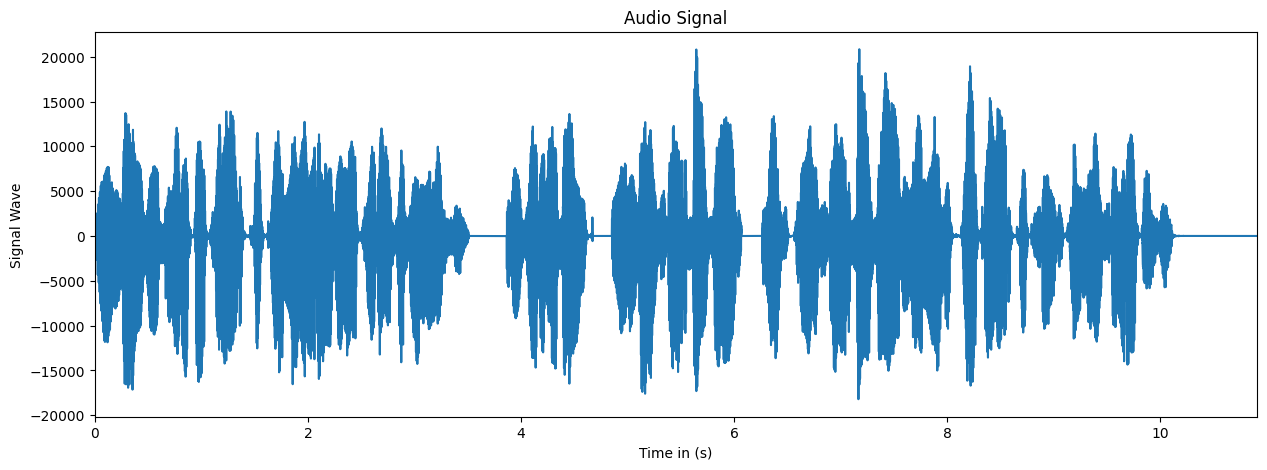

In [14]:
# Since byte object we can create a numpy array outof it
signal_array = np.frombuffer(signal_wave, dtype=np.int16)

times = np.linspace(0, t_audio, num=n_samples)

plt.figure(figsize=(15,5))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal Wave")
plt.xlabel("Time in (s)")
plt.xlim(0, t_audio)
plt.show()

#### 5. Record from Microphhone

In [40]:
import pyaudio
import wave

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)

print("Start Recording.........")

seconds = 5
frames = []
for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
    data = stream.read(FRAMES_PER_BUFFER,
                       exception_on_overflow=True)
    frames.append(data)

print(len(frames))
stream.stop_stream()
stream.close()
p.terminate()

# Now save it
obj = wave.open("microphone_record.wav", "wb")
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b"".join(frames))
obj.close()

Start Recording.........
25


#### 6. Load `mp3` files
we required `Pydub` library

In [43]:
from pydub import AudioSegment

audio = AudioSegment.from_wav("marathi2.wav")

# increase the volume by 6 db
audio = audio + 6

# repeat the clip
audio = audio * 2

audio = audio.fade_in(2000)

audio.export("Mashup.mp3", format="mp3")

# audio2 = AudioSegment.from_mp3("marathi2.mp3")
print("Done")

FileNotFoundError: [WinError 2] The system cannot find the file specified